<a href="https://colab.research.google.com/github/Aranzazu21/Machine-Learning/blob/main/_Hands_on_3_Polynomial_Regression_Understanding_the_Process.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Hands-on 3: Polynomial Regression
**Alumno:** Jorge Limón Aranzazu  
**Materia:** Inteligencia Artificial  
**Fecha:** (11/07/2025)

*Introducción*


## **1. Introducción a la Regresión Polinómica**
La **regresión polinómica** es un tipo de regresión lineal donde la relación entre la variable de entrada `x` y la variable de salida `y` se expresa como un polinomio.  
En términos simples, es como ajustar una **curva** en lugar de una línea recta a los puntos de datos. Esta curva refleja cómo `y` cambia a medida que `x` se eleva a diferentes potencias (`x`, `x²`, `x³`, ...).  

Es útil cuando los datos muestran un patrón **no lineal**, indicando que la relación entre `x` y `y` es más compleja que un simple aumento o disminución constante.

---
## **2. Fórmula de la Regresión Polinómica**
Matemáticamente, se modela como un polinomio de grado `n`:

\[
y = a_0 + a_1 x + a_2 x^2 + a_3 x^3 + \dots + a_n x^n
\]

- `y` es la variable dependiente.  
- `x` es la variable independiente.  
- `a_0, a_1, ..., a_n` son los coeficientes que el modelo aprenderá.  

---
Ecuación general:

y = β₀ + β₁x + β₂x² + ... + βₙxⁿ + ε

Es útil cuando los datos tienen una forma curva y la regresión lineal simple no logra
representar correctamente la relación entre las variables. Este notebook implementa
la regresión polinómica paso a paso usando Python y scikit-learn.
"""

## **5. Implementación de la Regresión Polinómica**

### **Paso 1: Preparación de Datos**
- Recolectar y limpiar los datos.  
- Eliminar valores atípicos, ya que la regresión polinómica es sensible a ellos.

### **Paso 2: Selección del grado polinómico**
- Basado en inspección visual o validación cruzada, equilibrando simplicidad y precisión.

### **Paso 3: Entrenamiento del modelo**
- Ajustar un modelo de regresión lineal a las **características polinómicas** transformadas de los datos.

# Paso 1: Importar librerías

En este primer paso, importamos todas las librerías necesarias para implementar la regresión polinómica en Python:

- `numpy` (np): Permite crear y manipular arreglos y realizar operaciones matemáticas de manera eficiente.
- `matplotlib.pyplot` (plt): Se utiliza para graficar los datos y visualizar los resultados.
- `train_test_split` de `sklearn.model_selection`: Divide el conjunto de datos en subconjuntos de entrenamiento y prueba.
- `PolynomialFeatures` de `sklearn.preprocessing`: Transforma las variables originales en nuevas características polinómicas, necesarias para ajustar modelos no lineales.
- `LinearRegression` de `sklearn.linear_model`: Implementa el modelo de regresión lineal.
- `mean_squared_error` y `r2_score` de `sklearn.metrics`: Permiten evaluar el rendimiento del modelo.
- `Pipeline` de `sklearn.pipeline`: Facilita encadenar la transformación de datos y el entrenamiento del modelo en un solo objeto.
- `GridSearchCV` de `sklearn.model_selection`: Permite encontrar los mejores hiperparámetros del modelo mediante validación cruzada.
- `warnings`: Se utiliza para ignorar advertencias innecesarias durante la ejecución.



In [1]:

# Paso 1: Importar librerías

import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings('ignore')

## Dataset de Ejemplo

Se creó un dataset con los **nuevos casos de COVID-19 en China durante 30 días**.  
El archivo CSV tiene este formato:



In [2]:

# Paso 2: Preparar los datos (datos de Hassane Skikri)
# Datos originales: X representa la variable independiente y y la dependiente
X = np.arange(0, 40)
y = [1, 4, 5, 7, 8, 6, 9, 10, 10, 23, 25, 44, 50, 63, 67, 64, 62, 70, 75, 88,
     90, 92, 95, 100, 108, 135, 151, 160, 169, 172, 173, 176, 175, 175, 176, 178, 179, 180, 190, 201]


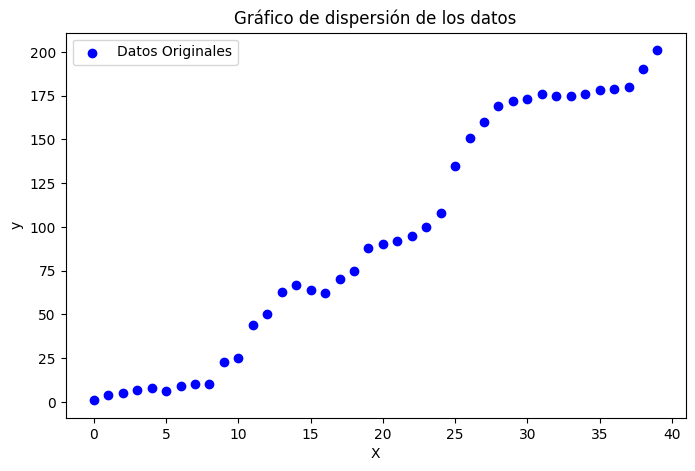

In [3]:
# Graficar los datos originales para observar la relación
plt.figure(figsize=(8,5))
plt.scatter(X, y, color='blue', label='Datos Originales')
plt.xlabel('X')
plt.ylabel('y')
plt.title('Gráfico de dispersión de los datos')
plt.legend()
plt.show()



# Paso 3: Dividir los datos en entrenamiento y prueba

En este paso separamos nuestros datos en dos conjuntos:

- **Conjunto de entrenamiento (Training set):** Usado para ajustar el modelo. En este caso, se utiliza el **80% de los datos**.
- **Conjunto de prueba (Test set):** Usado para evaluar el rendimiento del modelo con datos que no ha visto antes. En este caso, se utiliza el **20% restante**.

Parámetros importantes:

- `test_size=0.2`: Define la proporción de datos que irán al conjunto de prueba (20%).
- `random_state=42`: Fija la semilla aleatoria para que la división sea reproducible. Así, cada vez que ejecutes el notebook obtendrás la misma separación de datos.

> Esto es crucial para evaluar correctamente el desempeño del modelo y evitar **overfitting**, ya que garantiza que el modelo se prueba con datos independientes de los de entrenamiento.


In [4]:

# Paso 3: Dividir los datos en entrenamiento y prueba

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Paso 4: Configurar un Pipeline de regresión polinómica

En este paso creamos un **pipeline**, que es una forma de encadenar varias transformaciones y modelos en un solo objeto.  

Elementos del pipeline:

1. **PolynomialFeatures (`'poly'`)**  
   - Transforma los datos originales en características polinómicas de diferentes grados.  
   - Por ejemplo, si tenemos `x`, crea `[1, x, x², x³, ...]` dependiendo del grado que elijamos.  
   - Esto permite que un modelo lineal pueda ajustar relaciones no lineales.

2. **LinearRegression (`'linear'`)**  
   - Aplica un modelo de regresión lineal sobre las nuevas características polinómicas.  
   - Aunque estamos ajustando una curva, internamente sigue siendo un modelo lineal respecto a los coeficientes.

> La ventaja de usar un **pipeline** es que podemos combinar la transformación y el modelo en un solo objeto, facilitando tareas como **grid search** o validación cruzada.


In [5]:

# Paso 4: Configurar un Pipeline de regresión polinómica

pipeline = Pipeline([
    ('poly', PolynomialFeatures()),
    ('linear', LinearRegression())
])





# Paso 5: Selección del grado óptimo del polinomio con GridSearchCV

En este paso buscamos el **grado polinómico** que mejor se ajusta a los datos sin sobreajustar.

1. **Definición de parámetros**  
   - Creamos un diccionario `parameters` donde indicamos los grados a probar: `np.arange(1,5)` significa que probaremos grados 1, 2, 3 y 4.

2. **GridSearchCV**  
   - Evalúa automáticamente todas las combinaciones de parámetros indicados y determina cuál es el mejor.  
   - `cv=4` significa que usamos **validación cruzada** de 4 particiones (K-fold).  
   - `scoring='neg_mean_squared_error'` indica que el criterio para elegir el mejor modelo es **error cuadrático medio**, siendo menor el error, mejor el ajuste.

3. **Ajuste del modelo**  
   - `grid_search.fit(X_train.reshape(-1,1), y_train)` entrena el pipeline con cada grado de polinomio evaluando su desempeño.

4. **Resultado**  
   - `best_degree = grid_search.best_params_['poly__degree']` obtiene el grado que produjo el menor error.  
   - Esto nos permite usar el grado óptimo para entrenar el modelo final y obtener un ajuste más preciso.


In [6]:

# Paso 5: Selección del grado óptimo del polinomio con GridSearchCV

parameters = {'poly__degree': np.arange(1, 5)}
grid_search = GridSearchCV(pipeline, parameters, cv=4, scoring='neg_mean_squared_error')
grid_search.fit(X_train.reshape(-1,1), y_train)

best_degree = grid_search.best_params_['poly__degree']
print("El grado óptimo del polinomio es:", best_degree)



El grado óptimo del polinomio es: 3


# Paso 6: Transformar los datos según el mejor grado

En este paso preparamos los datos para entrenar el modelo usando el **grado polinómico óptimo** encontrado en el paso anterior.

1. **Crear objeto PolynomialFeatures**  
   - `poly_best = PolynomialFeatures(degree=best_degree)` crea una transformación que genera nuevas características elevando la variable `X` a todas las potencias desde 0 hasta `best_degree`.  
   - Por ejemplo, si `best_degree = 3`, cada dato `x` se transforma en `[1, x, x², x³]`.

2. **Transformar los datos de entrenamiento**  
   - `X_poly_train_best = poly_best.fit_transform(X_train.reshape(-1,1))` aplica la transformación a los datos de entrenamiento.  
   - `fit_transform` ajusta la transformación y luego la aplica.

3. **Transformar los datos de prueba**  
   - `X_poly_test_best = poly_best.transform(X_test.reshape(-1,1))` aplica la misma transformación a los datos de prueba, **sin recalcular los parámetros**, para asegurar consistencia en la predicción.


In [7]:

# Paso 6: Transformar los datos según el mejor grado

poly_best = PolynomialFeatures(degree=best_degree)
X_poly_train_best = poly_best.fit_transform(X_train.reshape(-1,1))
X_poly_test_best = poly_best.transform(X_test.reshape(-1,1))


# Paso 7: Entrenar el modelo final

En este paso entrenamos el **modelo de regresión lineal** usando las características polinómicas transformadas de los datos de entrenamiento.

1. **Crear el modelo**  
   - `model_best = LinearRegression()` crea un objeto de regresión lineal de scikit-learn.  
   - Aunque usamos regresión lineal, al aplicarla sobre características polinómicas, **el modelo aprende una curva**, no una línea recta.

2. **Entrenar el modelo**  
   - `model_best.fit(X_poly_train_best, y_train)` ajusta el modelo a los datos transformados.  
   - Durante el entrenamiento, el modelo encuentra los **coeficientes** que minimizan el error cuadrático entre las predicciones y los valores reales de `y_train`.


In [8]:

# Paso 7: Entrenar el modelo final

model_best = LinearRegression()
model_best.fit(X_poly_train_best, y_train)


LinearRegression()

# Paso 8: Hacer predicciones

En este paso usamos el **modelo entrenado** para hacer predicciones sobre los datos de entrenamiento y prueba.

1. **Predicciones en el conjunto de entrenamiento**  
   - `predictions_train = model_best.predict(X_poly_train_best)`  
   - Calcula los valores de `y` ajustados por el modelo para los datos que el modelo ya ha visto.  
   - Nos permite evaluar qué tan bien el modelo se ajustó a los datos de entrenamiento.

2. **Predicciones en el conjunto de prueba**  
   - `predictions_test = model_best.predict(X_poly_test_best)`  
   - Calcula los valores de `y` para los datos que **no fueron usados durante el entrenamiento**.  
   - Esto nos ayuda a medir la **capacidad de generalización** del modelo a datos nuevos.


In [9]:

# Paso 8: Hacer predicciones

predictions_train = model_best.predict(X_poly_train_best)
predictions_test = model_best.predict(X_poly_test_best)

# Paso 9: Evaluar el modelo

En este paso evaluamos el rendimiento del modelo utilizando métricas comunes en regresión:

1. **Error Cuadrático Medio (MSE)**  
   - `train_error = mean_squared_error(y_train, predictions_train)`  
   - `test_error = mean_squared_error(y_test, predictions_test)`  
   - Mide la **diferencia promedio al cuadrado** entre los valores reales y los predichos.  
   - Valores menores indican un mejor ajuste.

2. **Coeficiente de Determinación (R²)**  
   - `train_r2 = r2_score(y_train, predictions_train)`  
   - `test_r2 = r2_score(y_test, predictions_test)`  
   - Representa la proporción de la **varianza explicada** por el modelo.  
   - Valores cercanos a 1 indican que el modelo explica muy bien la variabilidad de los datos.

Estas métricas permiten comparar el ajuste del modelo en los datos de entrenamiento y prueba, ayudando a identificar **sobreajuste o subajuste**.


In [10]:
# ----------------------------------------------------------
# Paso 9: Evaluar el modelo
# ----------------------------------------------------------
train_error = mean_squared_error(y_train, predictions_train)
test_error = mean_squared_error(y_test, predictions_test)
train_r2 = r2_score(y_train, predictions_train)
test_r2 = r2_score(y_test, predictions_test)

print(f"Error cuadrático medio (train): {train_error:.2f}")
print(f"Error cuadrático medio (test): {test_error:.2f}")
print(f"R^2 (train): {train_r2:.3f}")
print(f"R^2 (test): {test_r2:.3f}")



Error cuadrático medio (train): 82.12
Error cuadrático medio (test): 93.20
R^2 (train): 0.983
R^2 (test): 0.972


# Paso 10: Graficar el ajuste de la regresión polinómica

En este paso visualizamos cómo el modelo polinómico se ajusta a los datos de entrenamiento y prueba:

1. **Datos de entrenamiento y prueba**  
   - Se representan como **puntos azules y verdes**, respectivamente.
   - Esto permite comparar visualmente cómo el modelo se ajusta a ambos conjuntos de datos.

2. **Curva de regresión polinómica**  
   - `X_range_poly = poly_best.transform(X_range)` transforma un rango de valores X a características polinómicas del grado óptimo.
   - `predictions_range = model_best.predict(X_range_poly)` genera las predicciones sobre este rango.
   - La curva roja representa el **ajuste del modelo** a los datos.

3. **Interpretación visual**  
   - La gráfica permite ver si el modelo captura la **tendencia no lineal** de los datos.
   - Es útil para detectar **sobreajuste** (curva demasiado ajustada) o **subajuste** (curva demasiado simple).


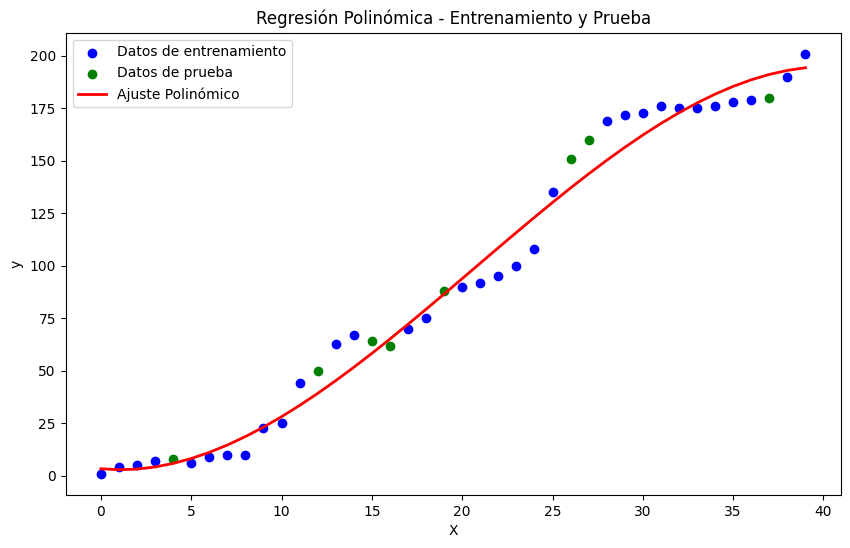

In [11]:
# ----------------------------------------------------------
# Paso 10: Graficar el ajuste de la regresión polinómica
# ----------------------------------------------------------
plt.figure(figsize=(10,6))
plt.scatter(X_train, y_train, color='blue', label='Datos de entrenamiento')
plt.scatter(X_test, y_test, color='green', label='Datos de prueba')

X_range = np.arange(0, 40).reshape(-1,1)
X_range_poly = poly_best.transform(X_range)
predictions_range = model_best.predict(X_range_poly)

plt.plot(X_range, predictions_range, color='red', linewidth=2, label='Ajuste Polinómico')
plt.xlabel('X')
plt.ylabel('y')
plt.title('Regresión Polinómica - Entrenamiento y Prueba')
plt.legend()
plt.show()